In [5]:
# import the necessary packages
import numpy as np
import cv2
import sys
import matplotlib.pyplot as plt
import tqdm as tqdm
import glob
sys.path.append("/Users/alex_wheelis/Documents/programming/red_wolf_detection/backend/algo_dev")
from misc import *

In [21]:
# cited: https://thedatafrog.com/en/articles/human-detection-video/

# initialize the HOG descriptor/person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())


human_dataset = glob.glob("/Users/alex_wheelis/Documents/programming/red_wolf_detection/human_detection_dataset/1/*.png")

model_output_dir = "/Users/alex_wheelis/Documents/programming/red_wolf_detection/human_detector_output/"

human_count = 0

for img_f in tqdm.tqdm(human_dataset): 
    
    img = cv2.imread(img_f)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    boxes, weights = hog.detectMultiScale(img, winStride=(8,8) )

    boxes = np.array([[x, y, x + w, y + h] for (x, y, w, h) in boxes])

    for (xA, yA, xB, yB) in boxes:
        # display the detected boxes in the colour picture
        cv2.rectangle(img, (xA, yA), (xB, yB),(0, 255, 0), 2)
    if len(boxes):
        human_count += 1
#     img_f = img_f[img_f.rindex("/")+1:]
#     cv2.imwrite(model_output_dir + "pred_" + img_f, img)
#     print(model_output_dir + "pred_" + img_f)



100%|██████████| 559/559 [01:30<00:00,  6.15it/s]


In [22]:
accuracy = human_count/len(human_dataset)
print("accuracy: ", accuracy*100)

accuracy:  56.529516994633276


In [2]:
from imageai.Detection import ObjectDetection

detector = ObjectDetection()
detector.setModelTypeAsTinyYOLOv3()
detector.setModelPath("tiny-yolov3.pt")
detector.loadModel()

In [38]:
test_f =  "IMG_0141"
wolf_dir = "/Users/alex_wheelis/Documents/Fall2022/ECE 484/DCIM/100_BTCF/"
wolf_test_vid = wolf_dir + test_f + ".MP4"
wolf_test_vid

'/Users/alex_wheelis/Documents/Fall2022/ECE 484/DCIM/100_BTCF/IMG_0141.MP4'

In [39]:
wolf_test_vid = load_video(wolf_test_vid, start = 0, end = 1000, interval = 20)
for i,frame in enumerate(wolf_test_vid):
    plt.imsave(f'./test_vid_wolf/{test_f}_{i}.png', frame, cmap = 'gray')

In [40]:
human_dataset = glob("/Users/alex_wheelis/Documents/programming/red_wolf_detection/human_detection_dataset/1/*.png")
wolf_dataset = glob(f"/Users/alex_wheelis/Documents/programming/red_wolf_detection/backend/algo_dev/test_vid_wolf/{test_f}*.png")

In [31]:
len(wolf_dataset)

50

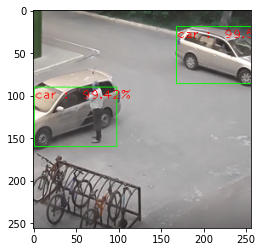

3
[{'name': 'car', 'percentage_probability': 99.55, 'box_points': [168, 19, 256, 86]}, {'name': 'car', 'percentage_probability': 99.42, 'box_points': [1, 90, 98, 160]}]


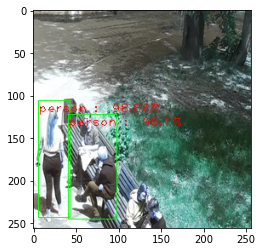

4
[{'name': 'person', 'percentage_probability': 98.86, 'box_points': [6, 106, 43, 243]}, {'name': 'person', 'percentage_probability': 98.1, 'box_points': [41, 122, 98, 245]}]


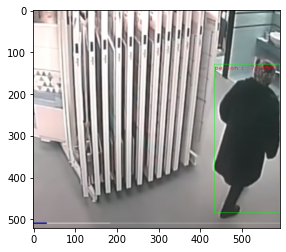

6
[{'name': 'person', 'percentage_probability': 76.99, 'box_points': [433, 129, 589, 484]}]


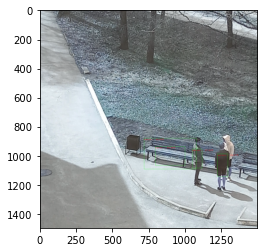

7
[{'name': 'person', 'percentage_probability': 99.07, 'box_points': [1218, 987, 1289, 1144]}, {'name': 'person', 'percentage_probability': 97.99, 'box_points': [1045, 953, 1112, 1084]}, {'name': 'bench', 'percentage_probability': 99.95, 'box_points': [714, 879, 1072, 1091]}, {'name': 'bench', 'percentage_probability': 99.96, 'box_points': [791, 936, 995, 1065]}]


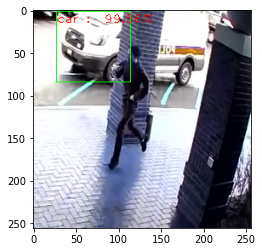

8
[{'name': 'car', 'percentage_probability': 99.56, 'box_points': [27, 1, 114, 84]}]


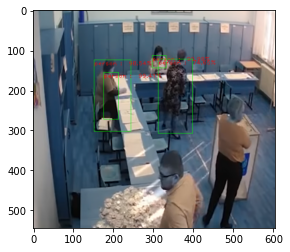

9
[{'name': 'person', 'percentage_probability': 99.99, 'box_points': [297, 113, 332, 144]}, {'name': 'person', 'percentage_probability': 98.54, 'box_points': [152, 124, 244, 302]}, {'name': 'person', 'percentage_probability': 99.41, 'box_points': [176, 155, 213, 272]}, {'name': 'person', 'percentage_probability': 74.65, 'box_points': [312, 122, 398, 307]}]


In [32]:
# test yolo on BASIC images
for i, img_f in enumerate(human_dataset[:10]):    
    returned_image, detections = detector.detectObjectsFromImage(input_image=human_dataset[i], output_type="array", minimum_percentage_probability=30)
    if len(detections):
        plt.imshow(returned_image)
        plt.show()
        print(i)
        print(detections)

In [41]:
# test yolo on WOLF images
for i, img_f in enumerate(wolf_dataset):    
    detections = detector.detectObjectsFromImage(input_image=wolf_dataset[i], output_image_path=f"/Users/alex_wheelis/Documents/programming/red_wolf_detection/backend/algo_dev/yolo_detects/{test_f}_{i}.jpg", minimum_percentage_probability=5)    
#     print(len(detections))
    #     detector.detectObjectsFromImage(input_image=wolf_dataset[i], output_image_path="/backend/algo_dev/yolo_detects/{1}.jpg", minimum_percentage_probability=5)
#     returned_image, detections = detector.detectObjectsFromImage(input_image=wolf_dataset[i], output_type="array", minimum_percentage_probability=5)
    if len(detections):
#         plt.imshow(returned_image)
#         plt.show()
        print(i)
        print(detections)

In [38]:
# basic wolf video 
wolf_dir = "/Users/alex_wheelis/Documents/Fall2022/ECE 484/DCIM/100_BTCF"

# list of wolf video files
wolf_vid_fs = glob(wolf_dir + "/*")

In [4]:
save_video(wolf_test_vid, "hz60", fps = 60)

/Users/alex_wheelis/Documents/programming/red_wolf_detection/backend/algo_dev/video/hz60.mp4


In [16]:
for i,frame in enumerate(wolf_test_vid):
    plt.imsave(f'./test_vid_wolf/{test_f}_{i}.png', frame, cmap = 'gray')


In [15]:
wolf_test_vid.shape

(121, 1080, 1920)

# YOLO with custom data

In [30]:
import pandas as pd
# go through and replace path of images with 'vet_data.../...png' or 'madison_data.../...png'
vet_df = pd.read_csv('./truths/labels_vet-school-dataset-1_2023-02-25-12-14-38.txt')
madison_df = pd.read_csv('./truths/madison_wolf_human_labels_2023-02-25-11-21-51.txt')

vet_imgs_dir = "vet_school_img_dataset"
madison_imgs_dir = "wolf_human_dataset"

vet_df["image_name"] = vet_imgs_dir + "/" + vet_df["image_name"]
madison_df["image_name"] = madison_imgs_dir + "/" + madison_df["image_name"]

In [33]:
wolf_df = pd.concat([vet_df, madison_df], ignore_index = True)
wolf_df = wolf_df[wolf_df['label_name'] == 'Wolf']
# shuffle dataset
wolf_df = wolf_df.sample(frac=1)

In [34]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(wolf_df, test_size=0.2)


wolf_human_dataset/vid_90_frame960.png


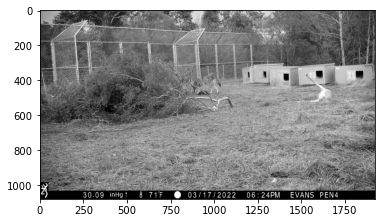

wolf_human_dataset/vid_50_frame960.png


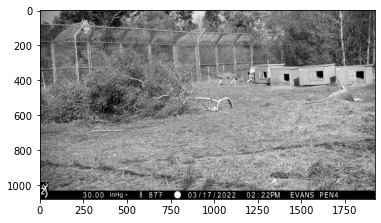

vet_school_img_dataset/vid_34_frame200.png


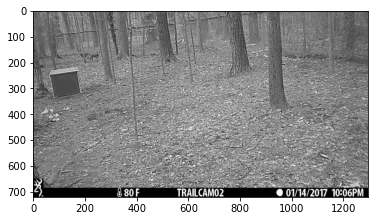

vet_school_img_dataset/vid_28_frame100.png


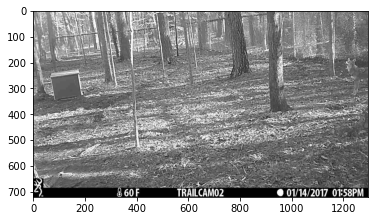

vet_school_img_dataset/vid_12_frame200.png


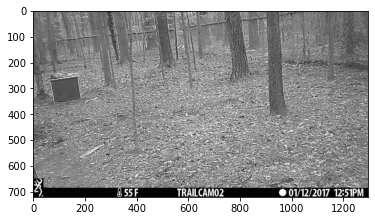

vet_school_img_dataset/vid_34_frame0.png


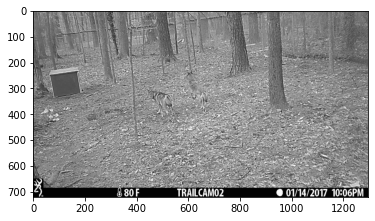

vet_school_img_dataset/vid_20_frame0.png


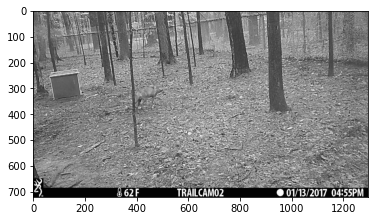

wolf_human_dataset/vid_140_frame600.png


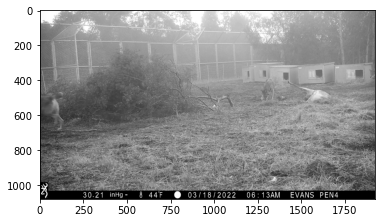

vet_school_img_dataset/vid_8_frame500.png


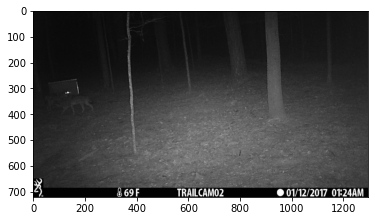

vet_school_img_dataset/vid_34_frame0.png


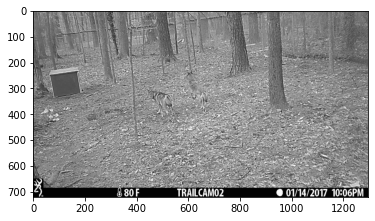

vet_school_img_dataset/vid_18_frame0.png


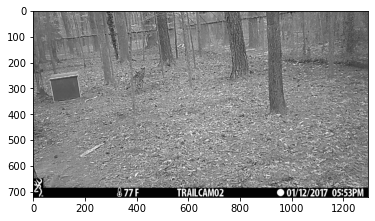

wolf_human_dataset/vid_80_frame720.png


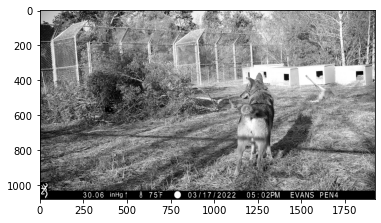

vet_school_img_dataset/vid_28_frame200.png


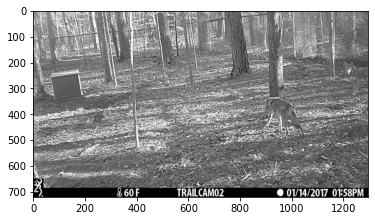

vet_school_img_dataset/vid_22_frame0.png


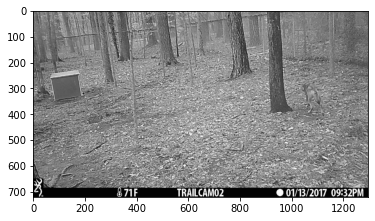

vet_school_img_dataset/vid_32_frame0.png


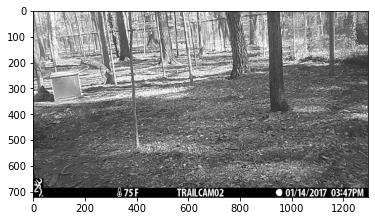

wolf_human_dataset/vid_180_frame360.png


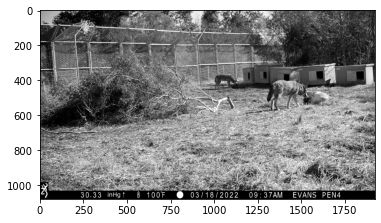

vet_school_img_dataset/vid_2_frame300.png


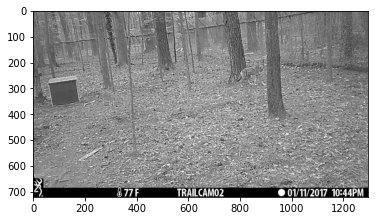

wolf_human_dataset/vid_90_frame600.png


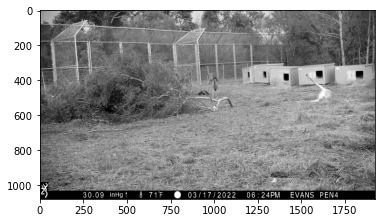

wolf_human_dataset/vid_90_frame360.png


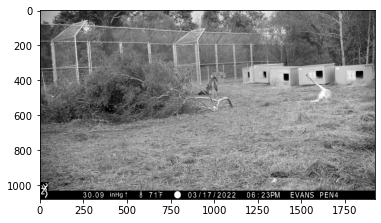

vet_school_img_dataset/vid_6_frame100.png


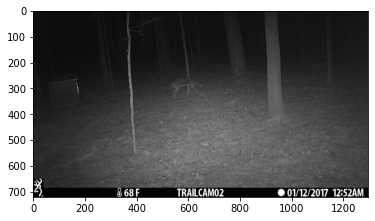

wolf_human_dataset/vid_160_frame840.png


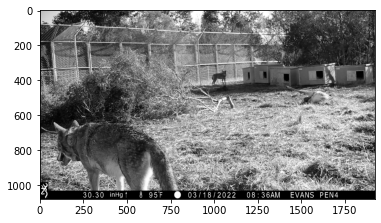

vet_school_img_dataset/vid_28_frame400.png


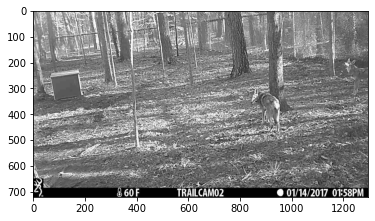

vet_school_img_dataset/vid_46_frame100.png


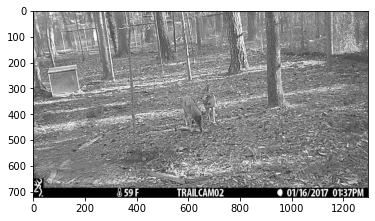

vet_school_img_dataset/vid_18_frame100.png


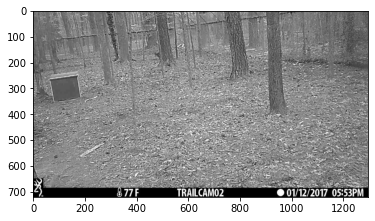

wolf_human_dataset/vid_50_frame120.png


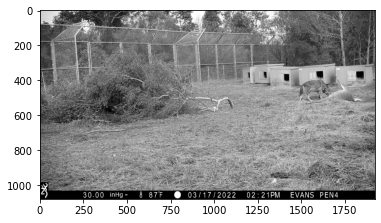

wolf_human_dataset/vid_140_frame240.png


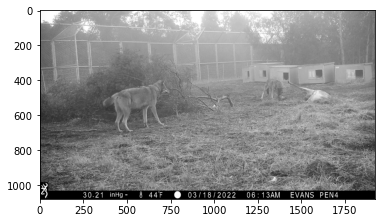

vet_school_img_dataset/vid_12_frame200.png


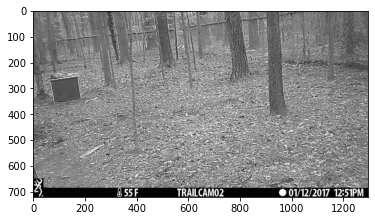

vet_school_img_dataset/vid_12_frame100.png


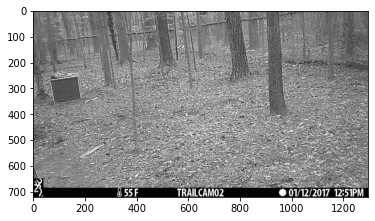

wolf_human_dataset/vid_80_frame1080.png


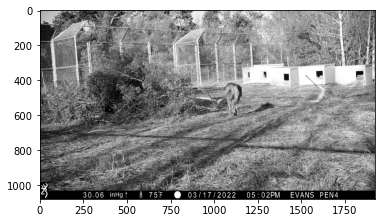

vet_school_img_dataset/vid_44_frame100.png


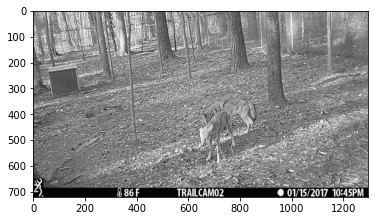

wolf_human_dataset/vid_80_frame120.png


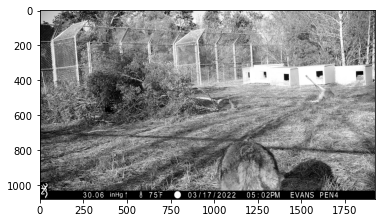

wolf_human_dataset/vid_170_frame960.png


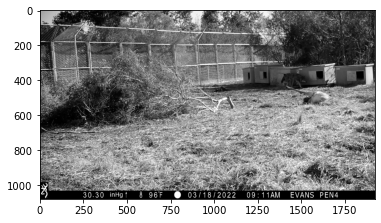

vet_school_img_dataset/vid_16_frame400.png


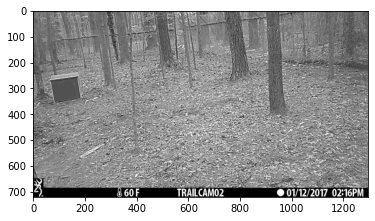

wolf_human_dataset/vid_110_frame1080.png


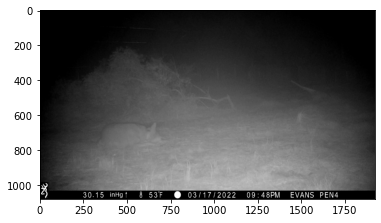

wolf_human_dataset/vid_140_frame360.png


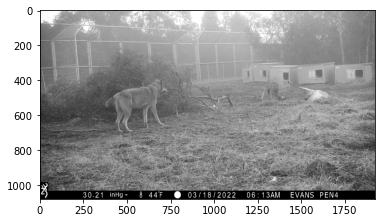

vet_school_img_dataset/vid_34_frame100.png


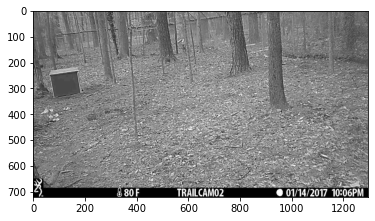

vet_school_img_dataset/vid_8_frame400.png


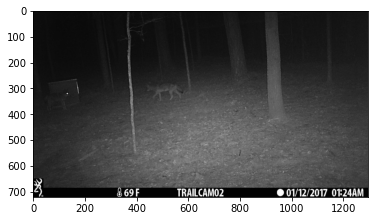

vet_school_img_dataset/vid_42_frame0.png


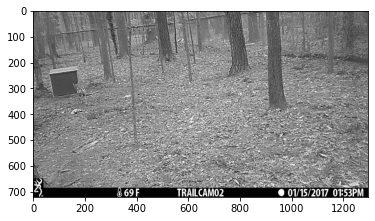

vet_school_img_dataset/vid_46_frame300.png


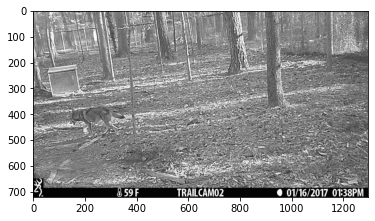

wolf_human_dataset/vid_110_frame240.png


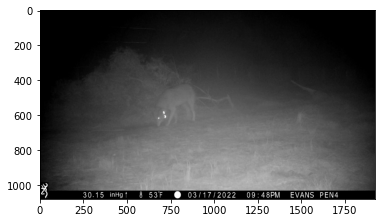

vet_school_img_dataset/vid_0_frame100.png


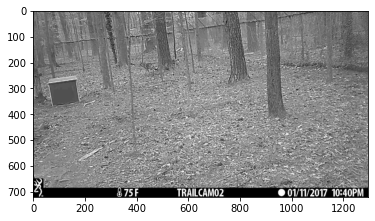

wolf_human_dataset/vid_90_frame240.png


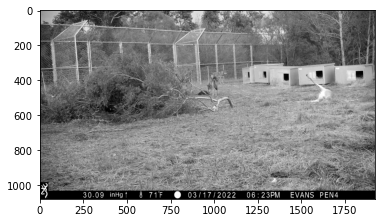

vet_school_img_dataset/vid_42_frame200.png


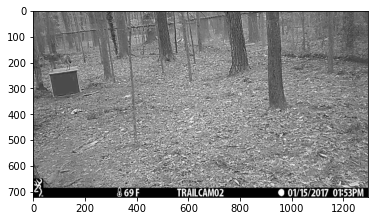

wolf_human_dataset/vid_160_frame0.png


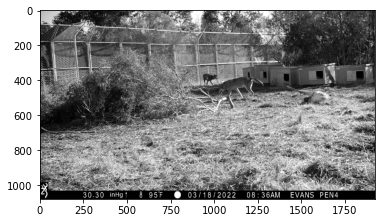

vet_school_img_dataset/vid_34_frame300.png


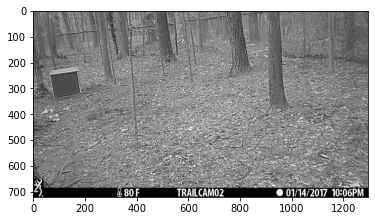

wolf_human_dataset/vid_50_frame840.png


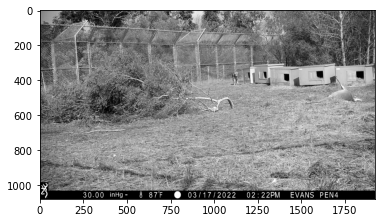

vet_school_img_dataset/vid_12_frame300.png


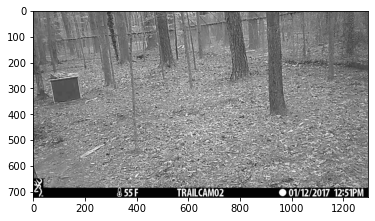

wolf_human_dataset/vid_140_frame0.png


KeyboardInterrupt: 

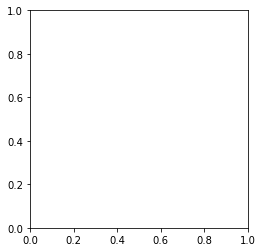

In [40]:
# make data dirs
for i, row in train.iterrows():
    img_f = row['image_name']
    print(img_f)
    img = plt.imread(f'./{img_f}')
    plt.imshow(img)
    plt.show()

In [7]:
train

label_name  bbox_x  bbox_y  bbox_width  bbox_height            image_name  \
135       Wolf     546     227          50           95      vid_8_frame0.png   
209       Wolf     435     438         414          249  vid_180_frame120.png   
180       Wolf    1283     378         120          139  vid_140_frame960.png   
47        Wolf     557     225          46           61   vid_22_frame100.png   
147       Wolf      29     303         122           84    vid_8_frame500.png   
..         ...     ...     ...         ...          ...                   ...   
110       Wolf     570     316          92          150   vid_46_frame100.png   
6         Wolf     172     322         158          105     vid_10_frame0.png   
123       Wolf     555     114          29           33   vid_50_frame200.png   
261       Wolf     981     390          47          108   vid_90_frame720.png   
246       Wolf     910     454         371          446   vid_80_frame840.png   

     image_width  image_height  
135         1296           720  
209         1920          1080  
180         1920          1080  
47          1296           720  
147         1296           720  
..           ...           ...  
110         1296           720  
6           1296           720  
123         1296           720  
261         1920          1080  
246         1920          1080  

[209 rows x 8 columns]